In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F

import matplotlib.pyplot as plt

import TorchDataset

In [7]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.inputLayer = torch.nn.Linear(2, 512)
        self.layer1 = torch.nn.Linear(512, 512)
        self.outputLayer = torch.nn.Linear(512, 3)

    def forward(self, x):
        s = F.relu(self.inputLayer(x))
        s = F.relu(self.layer1(s))
        y_hat = F.softmax(self.outputLayer(s), 1)
        return y_hat

In [8]:
def trainfn(model, criterion, optimizer, num_epochs, test_loader):
    acc = []
    for epoch in range(num_epochs):
        loss = None
        for t, (x, y) in enumerate(loader_train):
            x_var = x.float()
            y_var = y.long()
            y_hat = model(x_var)
            print(y_hat)
            print(y_var)
            loss = criterion(y_hat, y_var)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        acc.append(check_accuracy(model, test_loader))
        if (epoch + 1) % (num_epochs / 10) == 0:
            print('Epoch = %d, loss = %.4f, acc = %.4f' % (epoch + 1, loss.data, acc[-1]))
    return acc

In [9]:
def check_accuracy(model, loader):
    num_correct = 0
    num_samples = 0
    model.eval()
    for x, y in loader:
        x_var = x.float()
        scores = model(x_var)
        _, preds = scores.max(1)
        num_correct += (preds == y.long()).sum()
        num_samples += preds.size(0)
    acc = float(num_correct) / num_samples
    return acc

In [10]:
train = TorchDataset.dset_3NO(375)
test = TorchDataset.dset_3NO(125)
loader_train = DataLoader(train, batch_size=batch_size, shuffle=True)
loader_test = DataLoader(test, batch_size=batch_size, shuffle=True)

Epoch = 30, loss = 0.6039
Epoch = 60, loss = 0.5654
Epoch = 90, loss = 0.5572
Epoch = 120, loss = 0.5671
Epoch = 150, loss = 0.5597
Epoch = 180, loss = 0.5675
Epoch = 210, loss = 0.5558
Epoch = 240, loss = 0.5882
Epoch = 270, loss = 0.5736
Epoch = 300, loss = 0.5872
Got 372 / 375 correct (99.20)


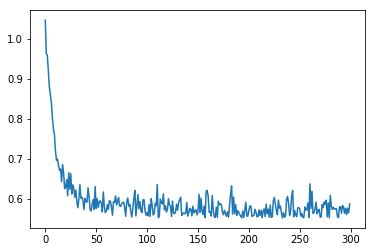

In [186]:
num_epochs = 300
batch_size = 64
learning_rate = 0.001

model = Model()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

acc = trainfn(model, criterion, optimizer, num_epochs, loader_test)
# check_accuracy(model, loader_test)
plt.plot(acc)
plt.show()

Epoch = 40, loss = 0.5785, acc = 0.9733
Epoch = 80, loss = 0.5785, acc = 0.9707
Epoch = 120, loss = 0.6055, acc = 0.9680
Epoch = 160, loss = 0.5785, acc = 0.9733
Epoch = 200, loss = 0.5785, acc = 0.9707
Epoch = 240, loss = 0.5516, acc = 0.9707
Epoch = 280, loss = 0.6327, acc = 0.9733
Epoch = 320, loss = 0.5785, acc = 0.9733
Epoch = 360, loss = 0.5514, acc = 0.9733
Epoch = 400, loss = 0.5514, acc = 0.9733


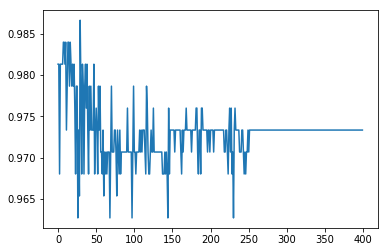

0.9866666666666667


In [259]:
num_epochs = 400
batch_size = 16
learning_rate = 0.001

model = Model()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

acc = trainfn(model, criterion, optimizer, num_epochs, loader_test)
# check_accuracy(model, loader_test)
plt.plot(acc)
plt.show()
print(max(acc))

In [11]:
num_epochs = 400
batch_size = 16
learning_rate = 0.001

model = Model()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

acc = trainfn(model, criterion, optimizer, num_epochs, loader_test)
# check_accuracy(model, loader_test)
plt.plot(acc)
plt.show()
print(max(acc))

tensor([[ 0.4014,  0.2838,  0.3148],
        [ 0.3293,  0.2722,  0.3986],
        [ 0.2969,  0.2461,  0.4570],
        [ 0.4010,  0.2792,  0.3198],
        [ 0.3924,  0.2865,  0.3211],
        [ 0.3366,  0.3005,  0.3630],
        [ 0.3606,  0.3047,  0.3347],
        [ 0.3374,  0.2913,  0.3713],
        [ 0.3270,  0.2927,  0.3804],
        [ 0.3026,  0.2586,  0.4388],
        [ 0.2911,  0.2650,  0.4439],
        [ 0.3812,  0.3024,  0.3164],
        [ 0.3433,  0.2768,  0.3799],
        [ 0.2982,  0.2952,  0.4066],
        [ 0.3050,  0.2644,  0.4305],
        [ 0.2943,  0.2534,  0.4523]])
tensor([ 0,  1,  2,  0,  0,  1,  0,  1,  2,  2,  2,  0,  1,  2,
         2,  2])
tensor([[ 0.5535,  0.1558,  0.2907],
        [ 0.3327,  0.4499,  0.2173],
        [ 0.6774,  0.1417,  0.1809],
        [ 0.1338,  0.1402,  0.7260],
        [ 0.1872,  0.4587,  0.3541],
        [ 0.6948,  0.1562,  0.1490],
        [ 0.0981,  0.0624,  0.8395],
        [ 0.6948,  0.1326,  0.1726],
        [ 0.1331,  0.6180,  0.

        [ 4.2331e-08,  1.0000e+00,  9.6336e-07]])
tensor([ 1,  2,  0,  1,  1,  2,  1,  1,  0,  1,  0,  0,  1,  0,
         0,  1])
tensor([[ 7.2337e-06,  9.9998e-01,  1.2163e-05],
        [ 8.2366e-03,  9.6119e-01,  3.0571e-02],
        [ 1.4484e-04,  9.9982e-01,  3.3724e-05],
        [ 1.6460e-03,  8.7319e-01,  1.2516e-01],
        [ 9.9983e-01,  5.1219e-05,  1.1580e-04],
        [ 1.0637e-05,  9.9994e-01,  5.4248e-05],
        [ 1.0917e-03,  9.9811e-01,  7.9816e-04],
        [ 1.0000e+00,  4.9681e-09,  1.8647e-08],
        [ 1.5546e-06,  9.9988e-01,  1.1974e-04],
        [ 1.1381e-05,  9.9974e-01,  2.4845e-04],
        [ 1.1814e-04,  5.7257e-05,  9.9982e-01],
        [ 3.2610e-06,  7.2842e-05,  9.9992e-01],
        [ 4.2503e-05,  9.9986e-01,  9.5679e-05],
        [ 8.0211e-05,  9.9961e-01,  3.1442e-04],
        [ 1.5500e-02,  9.8444e-01,  5.7825e-05],
        [ 5.6468e-05,  9.9992e-01,  2.7672e-05]])
tensor([ 1,  1,  1,  2,  0,  1,  1,  0,  1,  1,  2,  2,  1,  1,
         1,  1])
ten

        [ 6.9253e-05,  5.9514e-04,  9.9934e-01]])
tensor([ 1,  1,  0,  1,  0,  2,  2,  0,  0,  2,  1,  1,  1,  1,
         1,  2])
tensor([[ 3.6674e-06,  9.9892e-01,  1.0751e-03],
        [ 1.0000e+00,  1.1940e-07,  5.5786e-07],
        [ 5.9907e-06,  9.9988e-01,  1.1193e-04],
        [ 2.9488e-05,  9.9878e-01,  1.1947e-03],
        [ 9.9999e-01,  4.9274e-06,  3.8672e-06],
        [ 9.9291e-01,  4.8260e-03,  2.2594e-03],
        [ 6.0044e-08,  9.9998e-01,  1.5076e-05],
        [ 1.5299e-04,  9.9966e-01,  1.8359e-04],
        [ 1.0000e+00,  4.6147e-10,  2.5088e-10],
        [ 9.5047e-06,  9.9999e-01,  1.4297e-06],
        [ 9.9999e-01,  9.2961e-07,  6.1252e-06],
        [ 9.9880e-01,  7.3362e-04,  4.6884e-04],
        [ 1.4831e-04,  9.9932e-01,  5.3476e-04],
        [ 8.9024e-04,  1.3640e-05,  9.9910e-01],
        [ 1.7103e-04,  3.0351e-03,  9.9679e-01],
        [ 1.6079e-09,  1.1470e-09,  1.0000e+00]])
tensor([ 1,  0,  1,  1,  0,  0,  1,  1,  0,  1,  0,  0,  1,  2,
         2,  2])
ten

        [ 1.0000e+00,  1.6442e-07,  2.3474e-08]])
tensor([ 2,  0,  2,  1,  2,  0,  1,  0,  2,  2,  2,  1,  2,  2,
         1,  0])
tensor([[ 1.3942e-11,  1.0721e-14,  1.0000e+00],
        [ 8.5500e-04,  9.9838e-01,  7.6866e-04],
        [ 3.6566e-09,  1.0000e+00,  1.9527e-06],
        [ 1.0000e+00,  4.5625e-08,  4.0475e-08],
        [ 1.4404e-08,  9.9505e-01,  4.9468e-03],
        [ 4.5404e-03,  9.7215e-01,  2.3308e-02],
        [ 9.6462e-10,  4.6190e-12,  1.0000e+00],
        [ 1.9901e-05,  9.9996e-01,  2.3975e-05],
        [ 1.0975e-09,  5.6956e-14,  1.0000e+00],
        [ 1.0000e+00,  2.7131e-10,  2.0176e-10],
        [ 1.6917e-09,  1.0000e+00,  1.6694e-06],
        [ 1.0000e+00,  2.6762e-07,  5.5845e-08],
        [ 3.9067e-05,  9.3416e-01,  6.5802e-02],
        [ 3.7277e-07,  1.0000e+00,  2.3247e-06],
        [ 1.0000e+00,  2.7596e-07,  2.4658e-06],
        [ 2.0856e-03,  6.0120e-01,  3.9672e-01]])
tensor([ 2,  1,  1,  0,  1,  1,  2,  1,  2,  0,  1,  0,  1,  1,
         0,  1])
ten

        [ 2.1882e-08,  1.4485e-10,  1.0000e+00]])
tensor([ 2,  1,  0,  2,  0,  1,  1,  2,  1,  1,  2,  0,  2,  0,
         0,  2])
tensor([[ 1.0000e+00,  7.2161e-10,  1.2910e-10],
        [ 1.0000e+00,  3.8464e-14,  7.2628e-14],
        [ 1.0000e+00,  2.0712e-09,  1.0174e-08],
        [ 2.4788e-06,  7.5664e-07,  1.0000e+00],
        [ 2.8838e-07,  1.0000e+00,  2.7482e-08],
        [ 5.4233e-10,  1.4794e-09,  1.0000e+00],
        [ 1.0000e+00,  1.8893e-08,  2.2078e-09],
        [ 2.0070e-09,  4.4168e-10,  1.0000e+00],
        [ 4.6568e-07,  7.4915e-08,  1.0000e+00],
        [ 5.1464e-07,  5.7801e-10,  1.0000e+00],
        [ 5.0631e-08,  1.0000e+00,  2.4877e-06],
        [ 2.4606e-09,  1.6684e-08,  1.0000e+00],
        [ 2.3534e-02,  5.1982e-01,  4.5665e-01],
        [ 3.2959e-07,  9.6781e-06,  9.9999e-01],
        [ 4.0852e-07,  1.0000e+00,  1.1424e-09],
        [ 9.8727e-01,  1.2726e-02,  1.3615e-06]])
tensor([ 0,  0,  0,  2,  1,  2,  0,  2,  2,  2,  1,  2,  1,  2,
         1,  0])
ten

        [ 2.7860e-07,  1.0000e+00,  7.0078e-09]])
tensor([ 2,  0,  2,  2,  1,  0,  0,  1,  2,  0,  0,  1,  2,  1,
         0,  1])
tensor([[ 6.7546e-10,  1.6491e-11,  1.0000e+00],
        [ 3.1623e-06,  1.9299e-06,  9.9999e-01],
        [ 9.9973e-01,  4.8572e-05,  2.2466e-04],
        [ 5.2796e-14,  4.3893e-16,  1.0000e+00],
        [ 3.4612e-04,  9.9926e-01,  3.9206e-04],
        [ 3.3087e-13,  3.1373e-15,  1.0000e+00],
        [ 1.1088e-07,  1.0000e+00,  3.6132e-09],
        [ 9.5726e-09,  1.0000e+00,  8.8441e-09],
        [ 1.0000e+00,  1.3265e-11,  3.5298e-10],
        [ 2.0953e-05,  9.9996e-01,  1.8485e-05],
        [ 3.0219e-07,  2.7032e-07,  1.0000e+00],
        [ 9.9567e-01,  2.2841e-03,  2.0426e-03],
        [ 1.0000e+00,  2.4034e-09,  1.9244e-09],
        [ 1.0000e+00,  8.5597e-09,  3.4028e-07],
        [ 9.1354e-08,  1.0000e+00,  4.7211e-07],
        [ 2.1585e-03,  7.1090e-01,  2.8695e-01]])
tensor([ 2,  2,  0,  2,  1,  2,  1,  1,  0,  1,  2,  0,  0,  0,
         1,  1])
ten

        [ 1.1386e-06,  3.2095e-06,  1.0000e+00]])
tensor([ 1,  1,  1,  0,  0,  2,  2,  1,  2,  2,  1,  2,  0,  1,
         2,  2])
tensor([[ 5.4491e-12,  1.2145e-13,  1.0000e+00],
        [ 3.2684e-08,  5.6027e-11,  1.0000e+00],
        [ 4.0263e-04,  1.3214e-06,  9.9960e-01],
        [ 4.5961e-13,  2.4575e-13,  1.0000e+00],
        [ 9.9998e-01,  1.9408e-05,  7.7714e-10],
        [ 1.0933e-05,  9.9999e-01,  5.8545e-08],
        [ 1.0000e+00,  7.9671e-08,  2.2994e-07],
        [ 1.9779e-09,  1.1379e-10,  1.0000e+00],
        [ 2.4727e-05,  3.5359e-08,  9.9998e-01],
        [ 3.0780e-06,  1.0000e+00,  1.2725e-07],
        [ 2.5612e-04,  9.9974e-01,  2.8186e-06],
        [ 3.9485e-07,  1.0000e+00,  1.3874e-08],
        [ 6.0055e-10,  1.5658e-09,  1.0000e+00],
        [ 6.4190e-10,  1.0000e+00,  1.9039e-12],
        [ 1.0000e+00,  1.2906e-07,  6.0488e-08],
        [ 6.7413e-08,  1.0000e+00,  8.5216e-09]])
tensor([ 2,  2,  2,  2,  0,  1,  0,  2,  2,  1,  1,  1,  2,  1,
         0,  1])
ten

         1,  2])
tensor([[ 7.7578e-07,  1.8185e-06,  1.0000e+00],
        [ 1.0000e+00,  1.8430e-14,  3.2679e-14],
        [ 1.6642e-04,  4.8015e-08,  9.9983e-01],
        [ 9.9999e-01,  3.4147e-06,  3.4869e-06],
        [ 1.4896e-03,  8.7117e-05,  9.9842e-01],
        [ 8.6473e-11,  2.7105e-11,  1.0000e+00],
        [ 1.7411e-04,  9.9959e-01,  2.3237e-04],
        [ 2.6713e-07,  1.0077e-05,  9.9999e-01],
        [ 5.4558e-06,  1.5971e-04,  9.9983e-01],
        [ 1.0000e+00,  2.6022e-15,  2.8731e-15],
        [ 9.9995e-01,  1.7312e-06,  5.2189e-05],
        [ 1.0000e+00,  4.1382e-16,  2.9599e-15],
        [ 7.2906e-06,  3.0217e-02,  9.6978e-01],
        [ 1.0000e+00,  8.5028e-20,  2.0055e-18],
        [ 1.0000e+00,  1.5121e-10,  1.3217e-10],
        [ 4.6557e-09,  3.7599e-08,  1.0000e+00]])
tensor([ 2,  0,  2,  0,  2,  2,  1,  2,  2,  0,  0,  0,  2,  0,
         0,  2])
tensor([[ 1.0320e-05,  9.9995e-01,  3.5777e-05],
        [ 1.5756e-08,  1.6310e-09,  1.0000e+00],
        [ 1.0956e-0

        [ 1.7877e-07,  1.0000e+00,  1.9655e-07]])
tensor([ 1,  0,  2,  0,  1,  0,  0,  2,  1,  1,  1,  1,  1,  0,
         2,  1])
tensor([[ 1.0000e+00,  1.5561e-07,  6.1443e-09],
        [ 9.9998e-01,  1.9084e-05,  1.8264e-07],
        [ 1.0431e-06,  9.3912e-01,  6.0884e-02],
        [ 3.1451e-12,  1.1400e-12,  1.0000e+00],
        [ 6.9571e-08,  8.0669e-04,  9.9919e-01],
        [ 1.0000e+00,  4.0551e-14,  1.8428e-10],
        [ 2.8108e-07,  2.9355e-05,  9.9997e-01],
        [ 2.6179e-04,  9.9971e-01,  2.7230e-05],
        [ 4.7119e-08,  1.0000e+00,  3.4915e-09],
        [ 1.0000e+00,  9.3510e-14,  2.5944e-13],
        [ 1.0000e+00,  1.2761e-09,  1.6714e-08],
        [ 1.0000e+00,  5.4086e-08,  1.2873e-07],
        [ 1.0000e+00,  1.7562e-10,  8.6200e-10],
        [ 3.8057e-08,  4.0781e-09,  1.0000e+00],
        [ 1.7635e-04,  1.9046e-02,  9.8078e-01],
        [ 1.0000e+00,  2.2454e-23,  3.3721e-24]])
tensor([ 0,  0,  2,  2,  2,  0,  2,  1,  1,  0,  0,  0,  0,  2,
         2,  0])
ten

        [ 5.9513e-08,  1.0000e+00,  5.4180e-09]])
tensor([ 2,  2,  1,  2,  1,  0,  2,  0,  1,  0,  1,  0,  0,  1,
         0,  1])
tensor([[ 4.6364e-04,  1.6314e-04,  9.9937e-01],
        [ 2.8341e-06,  1.0000e+00,  7.2148e-11],
        [ 1.0000e+00,  5.6001e-15,  3.5612e-14],
        [ 2.2979e-02,  4.4384e-01,  5.3318e-01],
        [ 9.9999e-01,  9.0730e-07,  1.2053e-05],
        [ 7.8710e-11,  3.8888e-13,  1.0000e+00],
        [ 6.3622e-14,  1.0000e+00,  7.4027e-15],
        [ 1.4350e-10,  1.0000e+00,  1.4765e-11],
        [ 8.4793e-10,  1.2310e-11,  1.0000e+00],
        [ 1.4962e-03,  1.1842e-02,  9.8666e-01],
        [ 4.8187e-07,  1.0000e+00,  3.2974e-06],
        [ 1.0000e+00,  1.1073e-13,  3.0554e-12],
        [ 1.0000e+00,  4.3494e-09,  2.6857e-07],
        [ 2.6504e-12,  9.3063e-15,  1.0000e+00],
        [ 1.0000e+00,  4.7724e-09,  4.0134e-06],
        [ 1.0000e+00,  1.8145e-12,  5.5393e-13]])
tensor([ 2,  1,  0,  0,  0,  2,  1,  1,  2,  2,  1,  0,  0,  2,
         0,  0])
ten

        [ 1.3131e-10,  1.0000e+00,  8.3960e-11]])
tensor([ 1,  2,  1,  1,  2,  0,  1,  0,  1,  2,  1,  0,  2,  1,
         0,  1])
tensor([[ 1.0000e+00,  3.5362e-12,  8.0103e-11],
        [ 9.9994e-01,  1.9640e-05,  3.9511e-05],
        [ 1.0000e+00,  2.5172e-07,  7.2554e-08],
        [ 5.4357e-09,  1.2984e-10,  1.0000e+00],
        [ 9.9989e-01,  4.1019e-05,  7.1255e-05],
        [ 1.5454e-05,  9.9998e-01,  6.4167e-07],
        [ 1.2458e-12,  1.1134e-12,  1.0000e+00],
        [ 9.9989e-01,  3.7889e-06,  1.0871e-04],
        [ 1.2417e-08,  1.0000e+00,  1.3814e-08],
        [ 4.2105e-24,  1.3746e-28,  1.0000e+00],
        [ 3.5843e-09,  4.8620e-08,  1.0000e+00],
        [ 1.0000e+00,  9.2457e-09,  3.6083e-08],
        [ 1.8499e-10,  1.0000e+00,  7.2684e-11],
        [ 1.0000e+00,  6.5082e-11,  7.2700e-07],
        [ 1.2096e-09,  4.9001e-11,  1.0000e+00],
        [ 2.6196e-08,  4.8852e-09,  1.0000e+00]])
tensor([ 0,  0,  0,  2,  0,  1,  2,  0,  1,  2,  2,  0,  1,  0,
         2,  2])
ten

        [ 2.3116e-07,  1.0000e+00,  2.1015e-07]])
tensor([ 1,  2,  1,  0,  1,  2,  0,  2,  0,  0,  2,  0,  2,  0,
         2,  1])
tensor([[ 1.2933e-10,  1.0000e+00,  1.7324e-08],
        [ 9.0016e-10,  1.0000e+00,  4.3363e-10],
        [ 5.9701e-07,  5.1191e-08,  1.0000e+00],
        [ 1.0000e+00,  1.4529e-08,  9.8018e-09],
        [ 7.9913e-05,  9.9990e-01,  1.7729e-05],
        [ 2.2713e-06,  1.0000e+00,  5.1181e-07],
        [ 1.2293e-08,  1.0000e+00,  2.3371e-07],
        [ 7.8634e-10,  1.0000e+00,  6.3962e-10],
        [ 1.0000e+00,  8.4218e-08,  1.3707e-07],
        [ 2.5582e-06,  5.7905e-08,  1.0000e+00],
        [ 8.1670e-08,  4.0912e-11,  1.0000e+00],
        [ 6.0654e-11,  3.7190e-13,  1.0000e+00],
        [ 3.9178e-09,  4.6917e-10,  1.0000e+00],
        [ 3.6195e-05,  6.6713e-07,  9.9996e-01],
        [ 2.3624e-12,  2.2401e-14,  1.0000e+00],
        [ 4.7827e-10,  1.0000e+00,  6.6219e-11]])
tensor([ 1,  1,  2,  0,  1,  1,  1,  1,  0,  2,  2,  2,  2,  2,
         2,  1])
ten

        [ 5.7490e-17,  1.0000e+00,  2.3259e-18]])
tensor([ 0,  0,  2,  2,  2,  2,  2,  1,  0,  2,  1,  0,  0,  2,
         2,  1])
tensor([[ 2.8479e-07,  2.7070e-06,  1.0000e+00],
        [ 5.2562e-03,  3.3198e-06,  9.9474e-01],
        [ 1.5529e-08,  2.1536e-09,  1.0000e+00],
        [ 3.2228e-11,  1.0000e+00,  3.7003e-12],
        [ 9.8496e-01,  1.7289e-05,  1.5027e-02],
        [ 1.0000e+00,  9.2981e-11,  2.6787e-10],
        [ 8.3755e-05,  9.9988e-01,  3.5804e-05],
        [ 2.0372e-07,  3.8432e-09,  1.0000e+00],
        [ 1.8327e-14,  4.1609e-16,  1.0000e+00],
        [ 5.4629e-08,  1.0000e+00,  5.5410e-09],
        [ 3.8795e-02,  9.6117e-01,  3.4385e-05],
        [ 8.3456e-06,  9.9999e-01,  6.6882e-08],
        [ 8.9459e-05,  5.4732e-01,  4.5259e-01],
        [ 4.0148e-12,  1.0000e+00,  6.1342e-14],
        [ 3.1583e-05,  9.9992e-01,  4.7641e-05],
        [ 1.0639e-04,  9.9985e-01,  4.7984e-05]])
tensor([ 2,  0,  2,  1,  0,  0,  1,  2,  2,  1,  1,  1,  2,  1,
         1,  1])
ten

        [ 1.0000e+00,  2.0848e-09,  3.5622e-08]])
tensor([ 0,  1,  0,  2,  2,  0,  0,  2,  1,  1,  0,  1,  0,  1,
         0,  0])
tensor([[ 6.1099e-07,  9.9999e-01,  1.0316e-05],
        [ 1.0000e+00,  1.9633e-18,  3.1500e-15],
        [ 2.3109e-05,  9.9966e-01,  3.1296e-04],
        [ 1.5615e-06,  1.0000e+00,  6.6419e-07],
        [ 4.7604e-05,  5.8738e-03,  9.9408e-01],
        [ 3.2450e-05,  9.9996e-01,  5.8840e-06],
        [ 1.5533e-10,  1.6897e-13,  1.0000e+00],
        [ 6.2996e-05,  9.9188e-01,  8.0543e-03],
        [ 1.0000e+00,  6.5459e-12,  1.1313e-10],
        [ 2.6751e-09,  7.4119e-11,  1.0000e+00],
        [ 3.4456e-13,  2.8884e-19,  1.0000e+00],
        [ 2.1993e-05,  9.9998e-01,  1.5765e-06],
        [ 1.6780e-03,  9.9826e-01,  5.9359e-05],
        [ 1.1304e-04,  9.9950e-01,  3.9024e-04],
        [ 1.1675e-09,  1.0000e+00,  1.4320e-10],
        [ 9.9999e-01,  3.1136e-07,  7.2492e-06]])
tensor([ 1,  0,  1,  1,  1,  1,  2,  1,  0,  2,  2,  1,  1,  1,
         1,  0])
ten

tensor([ 2,  1,  0,  2,  1])
tensor([[ 1.0000e+00,  8.2950e-11,  4.9271e-10],
        [ 1.0000e+00,  7.5558e-12,  5.6568e-11],
        [ 1.8392e-07,  1.0000e+00,  1.0786e-09],
        [ 1.7008e-05,  4.7441e-05,  9.9994e-01],
        [ 1.8820e-06,  1.0000e+00,  5.9343e-07],
        [ 1.7635e-07,  1.0000e+00,  2.7633e-08],
        [ 1.6662e-06,  1.0000e+00,  3.5965e-08],
        [ 1.0000e+00,  2.6333e-14,  1.6492e-11],
        [ 8.1122e-06,  9.9999e-01,  1.6306e-06],
        [ 9.9986e-01,  1.1327e-05,  1.2377e-04],
        [ 3.3554e-08,  1.0000e+00,  8.6659e-10],
        [ 1.0000e+00,  2.2920e-10,  1.2807e-09],
        [ 9.4758e-01,  3.7277e-08,  5.2420e-02],
        [ 1.0000e+00,  1.1650e-18,  2.6560e-16],
        [ 1.0000e+00,  1.2093e-11,  2.3950e-10],
        [ 1.6538e-07,  1.0000e+00,  4.4883e-09]])
tensor([ 0,  0,  1,  2,  1,  1,  1,  0,  1,  0,  1,  0,  0,  0,
         0,  1])
tensor([[ 1.0000e+00,  5.9717e-10,  1.7032e-09],
        [ 1.0233e-02,  9.8939e-01,  3.7717e-04],
       

        [ 1.0000e+00,  2.7897e-10,  2.6924e-10]])
tensor([ 0,  2,  0,  0,  1,  1,  0,  1,  2,  0,  2,  0,  2,  2,
         1,  0])
tensor([[ 1.0000e+00,  1.8774e-19,  2.4079e-19],
        [ 1.0000e+00,  2.1407e-16,  1.3882e-16],
        [ 1.0000e+00,  1.8071e-17,  1.1037e-17],
        [ 1.8983e-10,  1.0000e+00,  4.5925e-13],
        [ 1.0000e+00,  6.1382e-08,  6.3669e-08],
        [ 1.0000e+00,  1.9947e-08,  2.0857e-09],
        [ 9.9980e-01,  9.6089e-06,  1.8962e-04],
        [ 9.9999e-01,  1.4177e-06,  3.6582e-06],
        [ 1.4008e-08,  1.4224e-11,  1.0000e+00],
        [ 1.0000e+00,  3.0881e-11,  8.9798e-12],
        [ 1.0000e+00,  5.1426e-11,  1.5656e-11],
        [ 1.5121e-08,  1.0000e+00,  1.2330e-08],
        [ 1.0000e+00,  3.1290e-17,  1.1429e-17],
        [ 7.5885e-06,  3.4930e-08,  9.9999e-01],
        [ 3.3231e-04,  1.4213e-06,  9.9967e-01],
        [ 1.7510e-06,  1.9130e-06,  1.0000e+00]])
tensor([ 0,  0,  0,  1,  0,  0,  0,  0,  2,  0,  0,  1,  0,  2,
         2,  2])
ten

        [ 5.2837e-06,  9.9999e-01,  3.1957e-08]])
tensor([ 0,  0,  0,  2,  0,  0,  2,  0,  0,  1,  1,  1,  1,  2,
         2,  1])
tensor([[ 1.3642e-05,  9.9999e-01,  1.7250e-07],
        [ 8.4875e-01,  2.0382e-06,  1.5125e-01],
        [ 1.4946e-06,  7.8197e-09,  1.0000e+00],
        [ 7.0246e-07,  1.0000e+00,  4.6218e-09],
        [ 4.8967e-11,  1.0000e+00,  3.2111e-11],
        [ 2.9342e-10,  1.0000e+00,  8.6945e-11],
        [ 1.0000e+00,  1.9841e-21,  3.9331e-21],
        [ 3.1362e-05,  9.9997e-01,  3.5057e-07],
        [ 5.9158e-04,  3.0564e-07,  9.9941e-01],
        [ 1.9633e-11,  1.0000e+00,  5.0561e-14],
        [ 1.0000e+00,  2.8152e-13,  3.4290e-13],
        [ 6.0863e-06,  9.9999e-01,  3.2733e-07],
        [ 9.9988e-01,  1.1462e-04,  5.0066e-06],
        [ 3.8182e-08,  2.5798e-12,  1.0000e+00],
        [ 1.2228e-06,  1.0000e+00,  9.8132e-07],
        [ 1.0807e-09,  5.8749e-14,  1.0000e+00]])
tensor([ 1,  2,  2,  1,  1,  1,  0,  1,  2,  1,  0,  1,  0,  2,
         1,  2])
ten

        [ 2.1667e-07,  1.0000e+00,  1.4230e-06]])
tensor([ 2,  0,  1,  0,  2,  2,  0,  0,  2,  0,  2,  0,  0,  2,
         0,  1])
tensor([[ 1.8994e-10,  5.2162e-14,  1.0000e+00],
        [ 7.3040e-05,  6.3045e-08,  9.9993e-01],
        [ 9.5141e-09,  9.1886e-12,  1.0000e+00],
        [ 1.7476e-05,  2.5663e-06,  9.9998e-01],
        [ 8.0356e-10,  9.8163e-13,  1.0000e+00],
        [ 2.0061e-07,  1.2522e-09,  1.0000e+00],
        [ 5.1733e-03,  8.4189e-07,  9.9483e-01],
        [ 4.2887e-08,  1.0000e+00,  2.4027e-12],
        [ 1.2288e-12,  9.1398e-14,  1.0000e+00],
        [ 1.0000e+00,  5.1004e-16,  5.6322e-15],
        [ 5.4954e-07,  1.0000e+00,  2.7188e-07],
        [ 1.0311e-09,  1.0559e-13,  1.0000e+00],
        [ 6.3382e-06,  2.0158e-06,  9.9999e-01],
        [ 3.3388e-04,  4.8440e-05,  9.9962e-01],
        [ 1.0000e+00,  6.6351e-09,  1.3769e-08],
        [ 5.9964e-07,  1.0000e+00,  7.0563e-09]])
tensor([ 2,  2,  2,  2,  2,  2,  2,  1,  2,  0,  1,  2,  2,  2,
         0,  1])
ten

        [ 1.0000e+00,  5.0223e-17,  1.0228e-15]])
tensor([ 1,  0,  1,  0,  1,  1,  1,  0,  0,  2,  1,  1,  2,  2,
         2,  0])
tensor([[ 1.5591e-11,  6.1077e-13,  1.0000e+00],
        [ 5.4127e-11,  3.2743e-13,  1.0000e+00],
        [ 9.1873e-16,  1.2011e-19,  1.0000e+00],
        [ 4.0161e-05,  9.9996e-01,  1.0503e-07],
        [ 1.0037e-05,  9.9999e-01,  7.3248e-09],
        [ 7.9327e-02,  9.2065e-01,  2.3165e-05],
        [ 1.0000e+00,  1.7393e-15,  6.5102e-15],
        [ 3.0766e-04,  9.9144e-01,  8.2571e-03],
        [ 1.3735e-10,  1.0000e+00,  3.6773e-13],
        [ 5.5170e-08,  1.0000e+00,  4.2532e-11],
        [ 2.5715e-16,  5.1146e-21,  1.0000e+00],
        [ 5.8130e-05,  9.9994e-01,  2.5769e-06],
        [ 1.0000e+00,  1.4926e-18,  9.0337e-16],
        [ 9.7889e-01,  2.8447e-04,  2.0827e-02],
        [ 9.9993e-01,  1.2536e-06,  6.4400e-05],
        [ 1.7224e-15,  6.1090e-19,  1.0000e+00]])
tensor([ 2,  2,  2,  1,  1,  1,  0,  1,  1,  1,  2,  1,  0,  0,
         0,  2])
ten

        [ 9.5622e-01,  5.6518e-04,  4.3218e-02]])
tensor([ 1,  1,  0,  1,  2,  2,  1,  1,  1,  2,  0,  1,  2,  1,
         1,  0])
tensor([[ 9.0152e-09,  1.0000e+00,  1.4243e-12],
        [ 1.3329e-09,  1.0000e+00,  2.2874e-11],
        [ 8.7311e-11,  1.0000e+00,  6.9861e-12],
        [ 1.9248e-09,  1.0000e+00,  6.4741e-10],
        [ 2.5135e-11,  4.0600e-15,  1.0000e+00],
        [ 4.1627e-08,  2.3778e-10,  1.0000e+00],
        [ 4.2369e-09,  1.0000e+00,  1.0993e-10],
        [ 1.0000e+00,  1.2100e-20,  2.3594e-18],
        [ 1.0000e+00,  2.8617e-11,  5.5029e-12],
        [ 9.7906e-08,  1.0000e+00,  5.2636e-10],
        [ 6.4898e-06,  2.7579e-10,  9.9999e-01],
        [ 1.2057e-11,  2.5857e-15,  1.0000e+00],
        [ 2.0454e-05,  1.1748e-09,  9.9998e-01],
        [ 1.0000e+00,  8.6823e-19,  5.0417e-17],
        [ 3.3326e-02,  9.6168e-01,  4.9914e-03],
        [ 1.2198e-07,  1.0000e+00,  1.8585e-10]])
tensor([ 1,  1,  1,  1,  2,  2,  1,  0,  0,  1,  2,  2,  2,  0,
         1,  1])
ten

        [ 1.0000e+00,  9.7537e-15,  7.3242e-13]])
tensor([ 2,  1,  1,  2,  0,  2,  2,  2,  0,  1,  1,  2,  0,  1,
         1,  0])
tensor([[ 2.8512e-02,  9.2028e-01,  5.1204e-02],
        [ 2.8227e-11,  1.0000e+00,  1.1469e-12],
        [ 1.0000e+00,  2.3834e-10,  1.5766e-10],
        [ 1.0000e+00,  8.4819e-12,  5.5386e-11],
        [ 1.0000e+00,  4.2706e-16,  1.0162e-12],
        [ 5.4763e-14,  1.2389e-14,  1.0000e+00],
        [ 1.5263e-11,  1.0000e+00,  5.2045e-13],
        [ 1.2117e-11,  6.4026e-13,  1.0000e+00],
        [ 1.0000e+00,  2.3003e-08,  3.3338e-06],
        [ 1.1107e-06,  9.4712e-07,  1.0000e+00],
        [ 4.4510e-07,  5.7717e-07,  1.0000e+00],
        [ 1.0000e+00,  1.4254e-13,  7.9940e-12],
        [ 1.0000e+00,  2.2074e-11,  1.8973e-10],
        [ 1.0000e+00,  3.8139e-15,  1.3845e-12],
        [ 9.5817e-10,  1.0000e+00,  8.0208e-10],
        [ 3.9813e-10,  8.4449e-12,  1.0000e+00]])
tensor([ 1,  1,  0,  0,  0,  2,  1,  2,  0,  2,  2,  0,  0,  0,
         1,  2])
ten

        [ 9.9992e-01,  1.9716e-07,  7.5584e-05]])
tensor([ 2,  0,  1,  1,  1,  0,  2,  2,  2,  0,  1,  2,  2,  2,
         1,  0])
tensor([[ 4.9384e-15,  1.0000e+00,  2.4818e-16],
        [ 1.0000e+00,  8.9306e-15,  3.9233e-13],
        [ 2.8711e-18,  1.0210e-17,  1.0000e+00],
        [ 1.0000e+00,  3.1148e-13,  6.3517e-12],
        [ 9.9854e-01,  3.7708e-04,  1.0781e-03]])
tensor([ 1,  0,  2,  0,  0])
tensor([[ 9.5736e-15,  1.0000e+00,  4.0609e-16],
        [ 1.0000e+00,  2.8134e-08,  1.5055e-07],
        [ 4.0873e-05,  9.9973e-01,  2.3039e-04],
        [ 5.8607e-07,  1.0000e+00,  3.5951e-08],
        [ 1.0000e+00,  5.0933e-08,  2.2384e-07],
        [ 2.4602e-16,  1.0000e+00,  1.6449e-17],
        [ 1.3691e-01,  5.9832e-09,  8.6309e-01],
        [ 5.9735e-12,  4.2131e-12,  1.0000e+00],
        [ 1.0000e+00,  2.1151e-07,  2.0502e-07],
        [ 1.0000e+00,  5.9987e-09,  1.2233e-08],
        [ 1.3353e-15,  5.1542e-16,  1.0000e+00],
        [ 3.8713e-12,  1.0000e+00,  1.6941e-12],
      

KeyboardInterrupt: 